# Student Performance Factors

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
file_path = 'StudentPerformanceFactors.csv'
student_data = pd.read_csv(file_path)

# Check data types and non-null values
data_info = student_data.info()

# Display summary statistics for numerical columns
data_description = student_data.describe()

# Display missing values per column
missing_values = student_data.isnull().sum()

# Display the data overview to the user
print("Data Info:")
print(data_info)

print("\n\nSummary Statistics for Numerical Columns:")
print(data_description)

print("\n\nMissing Values Count for Each Column:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [2]:
student_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
# Filling missing categorical values with mode
student_data['Teacher_Quality'].fillna(student_data['Teacher_Quality'].mode()[0], inplace=True)
student_data['Parental_Education_Level'].fillna(student_data['Parental_Education_Level'].mode()[0], inplace=True)
student_data['Distance_from_Home'].fillna(student_data['Distance_from_Home'].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_values_after = student_data.isnull().sum()

# Display the updated missing values count
print("\nMissing Values Count After Imputation:")
print(missing_values_after)


Missing Values Count After Imputation:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert binary categorical features using Label Encoding
binary_cols = ['Internet_Access', 'Learning_Disabilities', 'Extracurricular_Activities', 'Gender', 'School_Type']
le = LabelEncoder()

for col in binary_cols:
    student_data[col] = le.fit_transform(student_data[col])

# One-Hot Encoding for multi-class categorical columns
multi_class_cols = ['Access_to_Resources', 'Family_Income', 'Parental_Involvement', 'Motivation_Level', 'Teacher_Quality', 
                    'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home']
student_data = pd.get_dummies(student_data, columns=multi_class_cols)

# Display the first few rows of the dataset to verify changes
print("\nFirst Few Rows of Dataset After Encoding:")
print(student_data.head())


First Few Rows of Dataset After Encoding:
   Hours_Studied  Attendance  Extracurricular_Activities  Sleep_Hours  \
0             23          84                           0            7   
1             19          64                           0            8   
2             24          98                           1            7   
3             29          89                           1            8   
4             19          92                           1            6   

   Previous_Scores  Internet_Access  Tutoring_Sessions  School_Type  \
0               73                1                  0            1   
1               59                1                  2            1   
2               91                1                  2            1   
3               98                1                  1            1   
4               65                1                  3            1   

   Physical_Activity  Learning_Disabilities  ...  Teacher_Quality_Medium  \
0              

In [5]:
# Using IQR to detect and handle outliers for numerical features
Q1 = student_data[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']].quantile(0.25)
Q3 = student_data[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier range and capping values
for col in ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    student_data[col] = student_data[col].clip(lower_bound, upper_bound)

# Display the first few rows to verify changes
print("\nFirst Few Rows of Dataset After Outlier Handling:")
print(student_data.head())


First Few Rows of Dataset After Outlier Handling:
   Hours_Studied  Attendance  Extracurricular_Activities  Sleep_Hours  \
0             23          84                           0            7   
1             19          64                           0            8   
2             24          98                           1            7   
3             29          89                           1            8   
4             19          92                           1            6   

   Previous_Scores  Internet_Access  Tutoring_Sessions  School_Type  \
0               73                1                0.0            1   
1               59                1                2.0            1   
2               91                1                2.0            1   
3               98                1                1.0            1   
4               65                1                3.0            1   

   Physical_Activity  Learning_Disabilities  ...  Teacher_Quality_Medium  \
0      

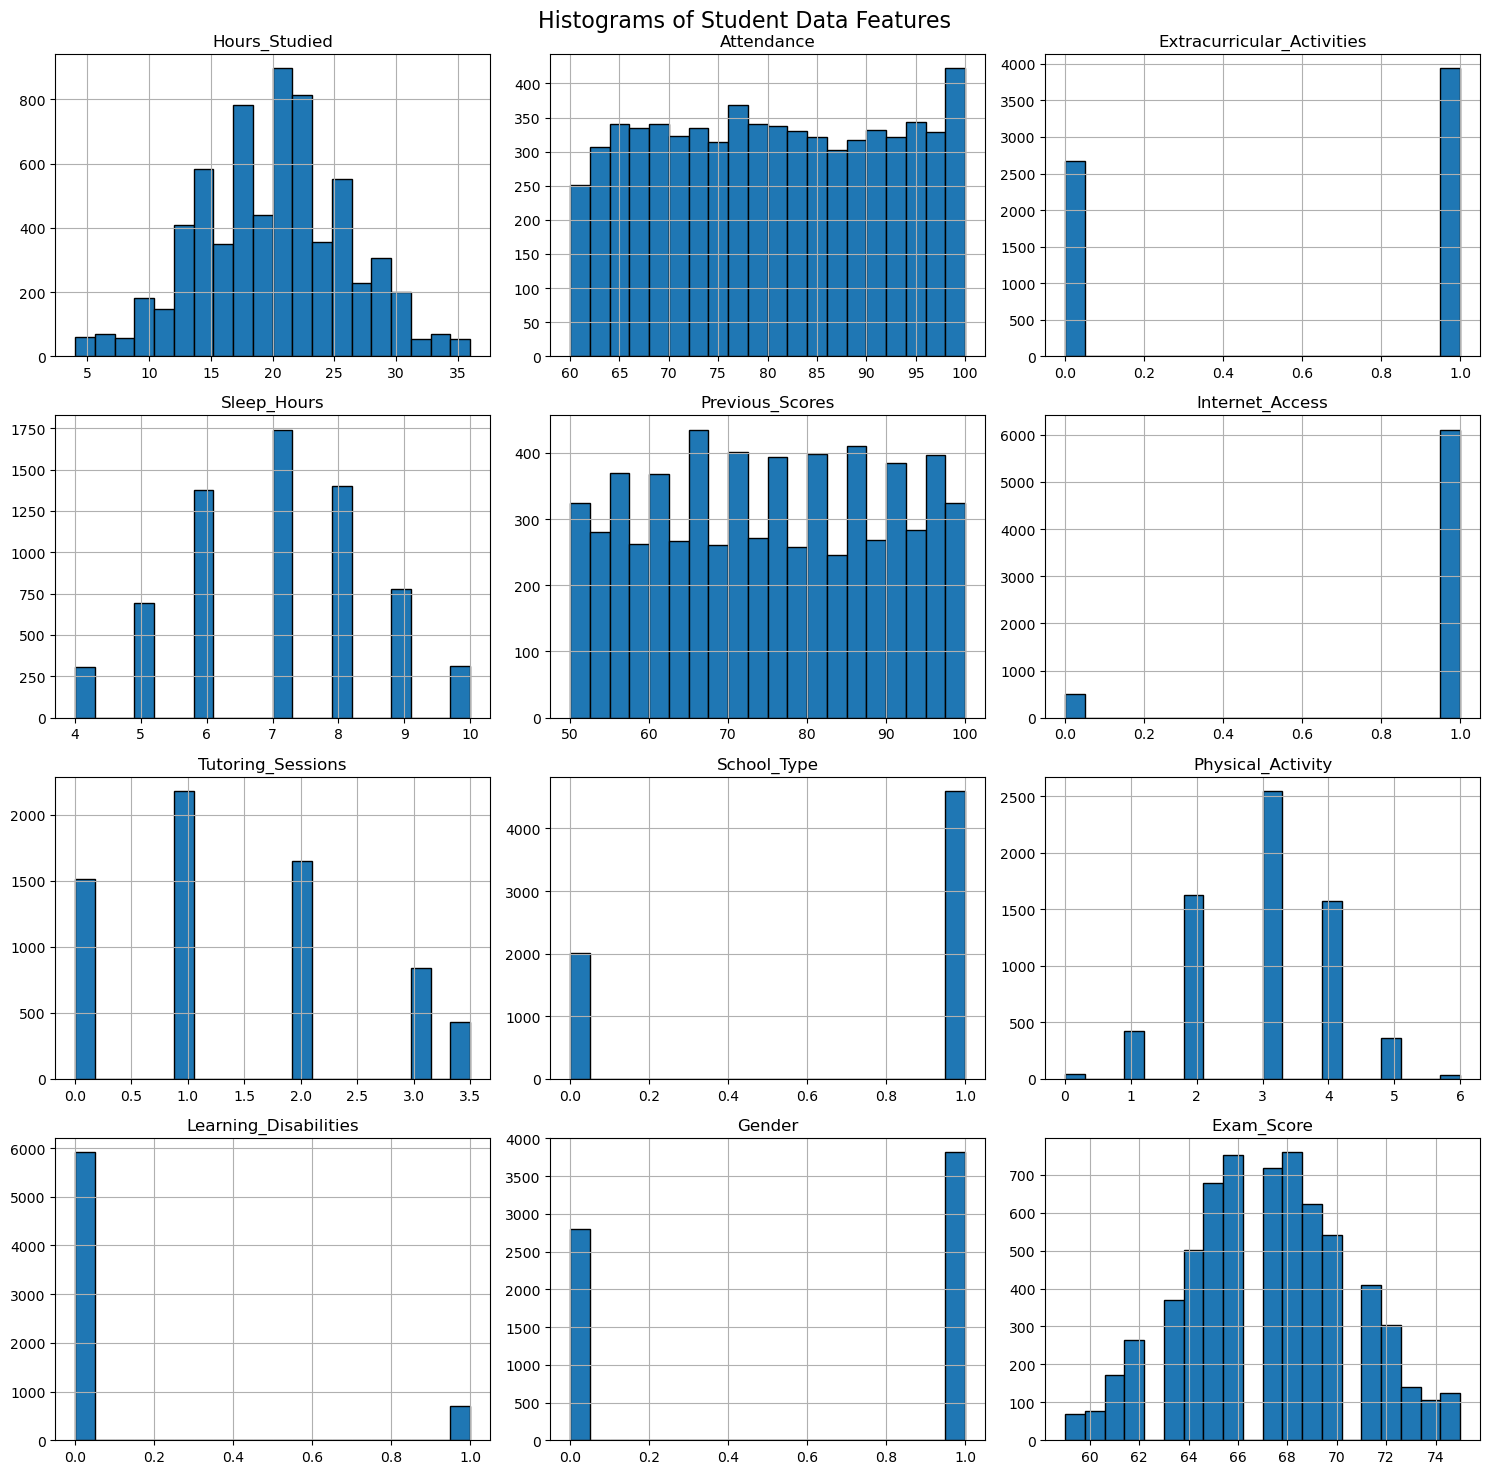

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for each column in the dataset
student_data.hist(figsize=(15, 15), bins=20, edgecolor='black')

# Set a super title for the entire figure
plt.suptitle("Histograms of Student Data Features", fontsize=16)

# Display the plot
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

# Applying StandardScaler to standardize the numerical data
scaler = StandardScaler()
student_data[numerical_cols] = scaler.fit_transform(student_data[numerical_cols])

# Display the first few rows to verify the changes
print("First Few Rows of Dataset After StandardScaler:")
print(student_data.head())

First Few Rows of Dataset After StandardScaler:
   Hours_Studied  Attendance  Extracurricular_Activities  Sleep_Hours  \
0       0.508885    0.348375                           0    -0.019796   
1      -0.163320   -1.383736                           0     0.661399   
2       0.676936    1.560853                           1    -0.019796   
3       1.517192    0.781403                           1     0.661399   
4      -0.163320    1.041220                           1    -0.700990   

   Previous_Scores  Internet_Access  Tutoring_Sessions  School_Type  \
0        -0.143800                1          -1.310621            1   
1        -1.116110                1           0.514305            1   
2         1.106313                1           0.514305            1   
3         1.592469                1          -0.398158            1   
4        -0.699406                1           1.426768            1   

   Physical_Activity  Learning_Disabilities  ...  Teacher_Quality_Medium  \
0         

# Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visual aesthetics
plt.style.use('ggplot')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


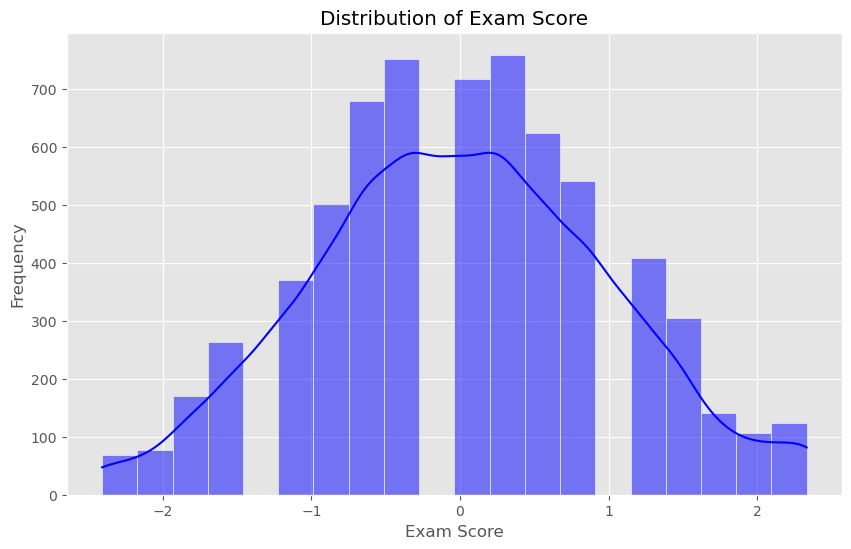

In [9]:
# Plotting the distribution of Exam_Score
plt.figure(figsize=(10, 6))
sns.histplot(student_data['Exam_Score'], kde=True, bins=20, color='blue')
plt.title('Distribution of Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

# Relationship Between Key Features and Exam_Score

/var/folders/jh/ytn_s8d54y99nc1xkd3y1sfc0000gn/T/ipykernel_29351/3271138142.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_avg_scores = student_data.groupby(attendance_bins)['Exam_Score'].mean()
/var/folders/jh/ytn_s8d54y99nc1xkd3y1sfc0000gn/T/ipykernel_29351/3271138142.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_studied_avg_scores = student_data.groupby(hours_studied_bins)['Exam_Score'].mean()
/var/folders/jh/ytn_s8d54y99nc1xkd3y1sfc0000gn/T/ipykernel_29351/3271138142.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future versio

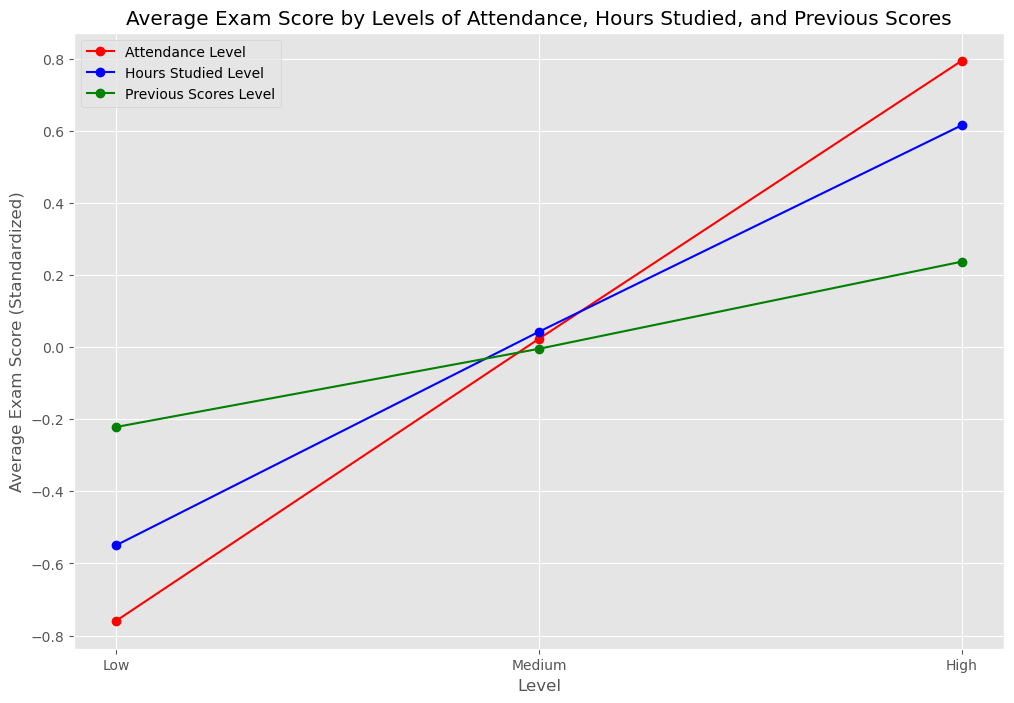

In [10]:
# Calculating average Exam Score per Attendance level (after binning)
attendance_bins = pd.qcut(student_data['Attendance'], q=3, labels=['Low', 'Medium', 'High'])
attendance_avg_scores = student_data.groupby(attendance_bins)['Exam_Score'].mean()

# Binning Hours_Studied into three levels
hours_studied_bins = pd.qcut(student_data['Hours_Studied'], q=3, labels=['Low', 'Medium', 'High'])
hours_studied_avg_scores = student_data.groupby(hours_studied_bins)['Exam_Score'].mean()

# Binning Previous_Scores into three levels
previous_scores_bins = pd.qcut(student_data['Previous_Scores'], q=3, labels=['Low', 'Medium', 'High'])
previous_scores_avg = student_data.groupby(previous_scores_bins)['Exam_Score'].mean()

# Plotting all three in a single graph
plt.figure(figsize=(12, 8))

plt.plot(attendance_avg_scores.index, attendance_avg_scores.values, marker='o', linestyle='-', color='red', label='Attendance Level')
plt.plot(hours_studied_avg_scores.index, hours_studied_avg_scores.values, marker='o', linestyle='-', color='blue', label='Hours Studied Level')
plt.plot(previous_scores_avg.index, previous_scores_avg.values, marker='o', linestyle='-', color='green', label='Previous Scores Level')

plt.title('Average Exam Score by Levels of Attendance, Hours Studied, and Previous Scores')
plt.xlabel('Level')
plt.ylabel('Average Exam Score (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

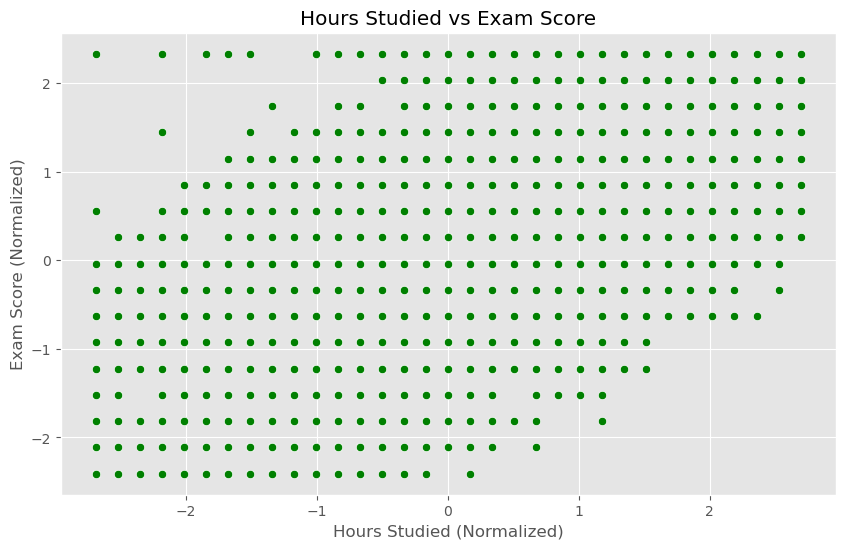

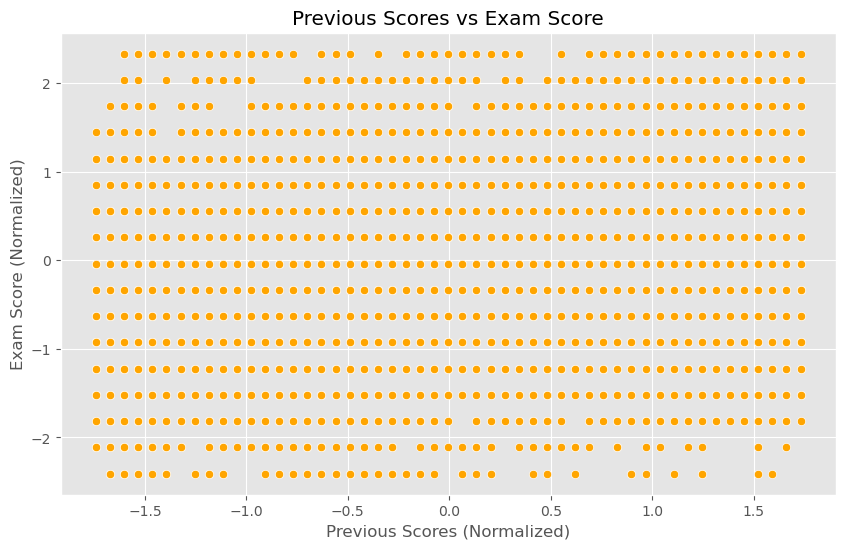

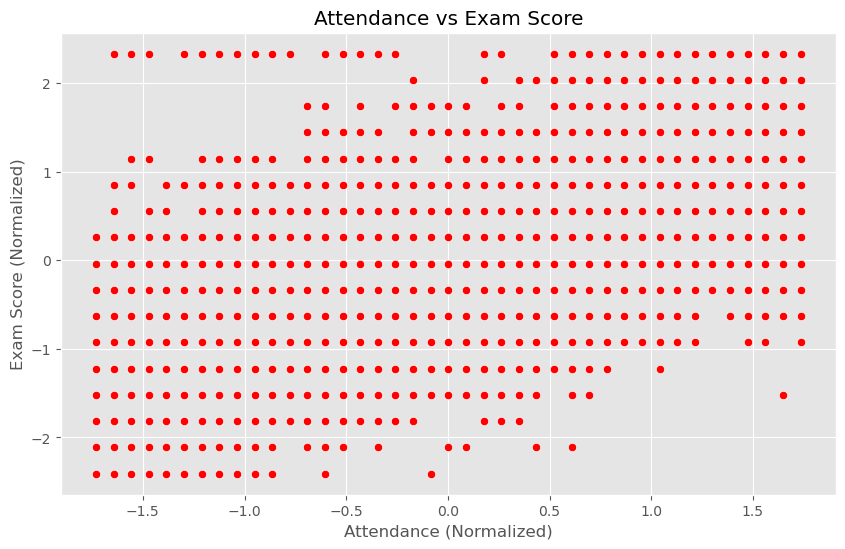

In [11]:
# Scatter plot for Hours_Studied vs Exam_Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=student_data, x='Hours_Studied', y='Exam_Score', color='green')
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied (Normalized)')
plt.ylabel('Exam Score (Normalized)')
plt.show()

# Scatter plot for Previous_Scores vs Exam_Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=student_data, x='Previous_Scores', y='Exam_Score', color='orange')
plt.title('Previous Scores vs Exam Score')
plt.xlabel('Previous Scores (Normalized)')
plt.ylabel('Exam Score (Normalized)')
plt.show()

# Scatter plot for Attendance vs Exam_Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=student_data, x='Attendance', y='Exam_Score', color='red')
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance (Normalized)')
plt.ylabel('Exam Score (Normalized)')
plt.show()

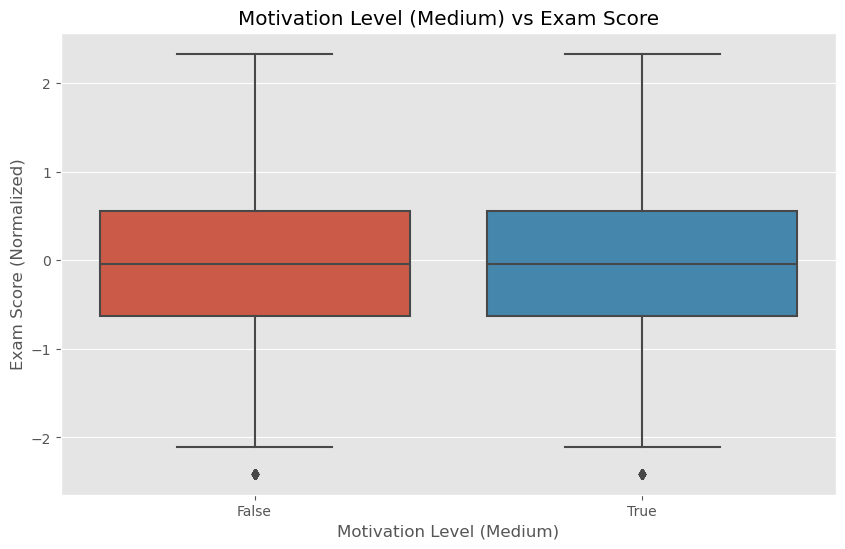

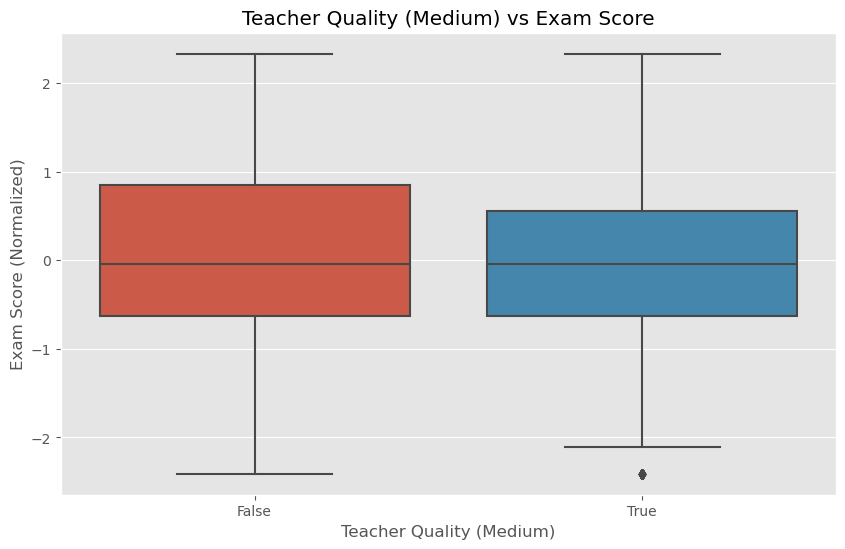

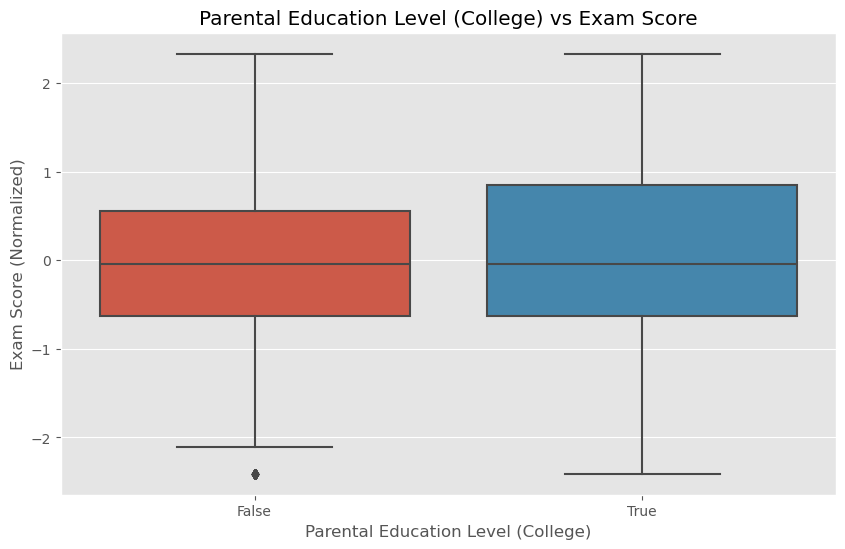

In [12]:
# Box plot for Motivation_Level vs Exam_Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_data, x='Motivation_Level_Medium', y='Exam_Score')
plt.title('Motivation Level (Medium) vs Exam Score')
plt.xlabel('Motivation Level (Medium)')
plt.ylabel('Exam Score (Normalized)')
plt.show()

# Box plot for Teacher_Quality vs Exam_Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_data, x='Teacher_Quality_Medium', y='Exam_Score')
plt.title('Teacher Quality (Medium) vs Exam Score')
plt.xlabel('Teacher Quality (Medium)')
plt.ylabel('Exam Score (Normalized)')
plt.show()

# Box plot for Parental_Education_Level vs Exam_Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=student_data, x='Parental_Education_Level_College', y='Exam_Score')
plt.title('Parental Education Level (College) vs Exam Score')
plt.xlabel('Parental Education Level (College)')
plt.ylabel('Exam Score (Normalized)')
plt.show()

# Feature selection

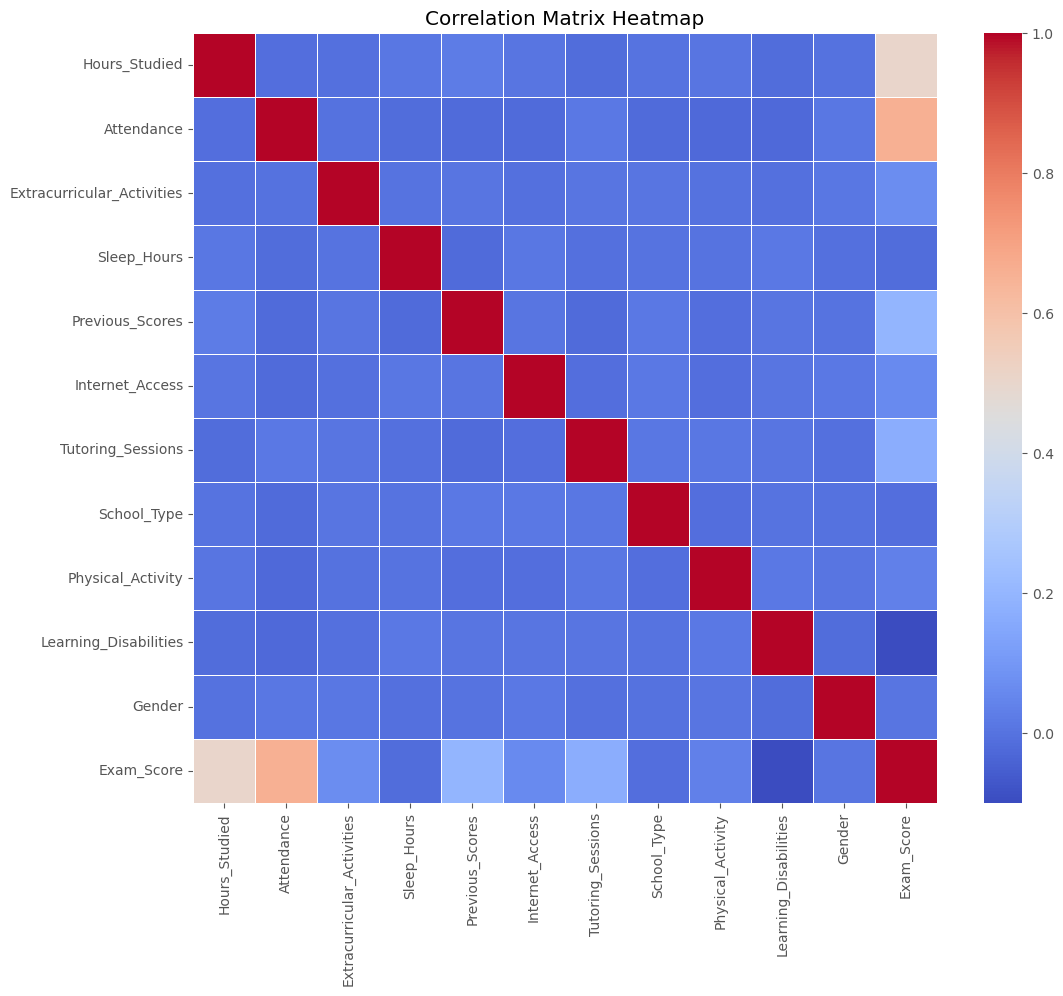


Correlation of Features with Exam_Score:

Exam_Score                    1.000000
Attendance                    0.660555
Hours_Studied                 0.504684
Previous_Scores               0.195737
Tutoring_Sessions             0.169505
Extracurricular_Activities    0.068166
Internet_Access               0.063424
Physical_Activity             0.037263
Gender                        0.004369
School_Type                  -0.012251
Sleep_Hours                  -0.014136
Learning_Disabilities        -0.099519
Name: Exam_Score, dtype: float64


In [13]:
# Correlation Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numerical columns for correlation analysis
numerical_data = student_data.select_dtypes(include=['int64', 'float64', 'uint8'])

# Plotting correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Displaying correlations of features with Exam_Score
exam_score_corr = correlation_matrix['Exam_Score'].sort_values(ascending=False)
print("\nCorrelation of Features with Exam_Score:\n")
print(exam_score_corr)

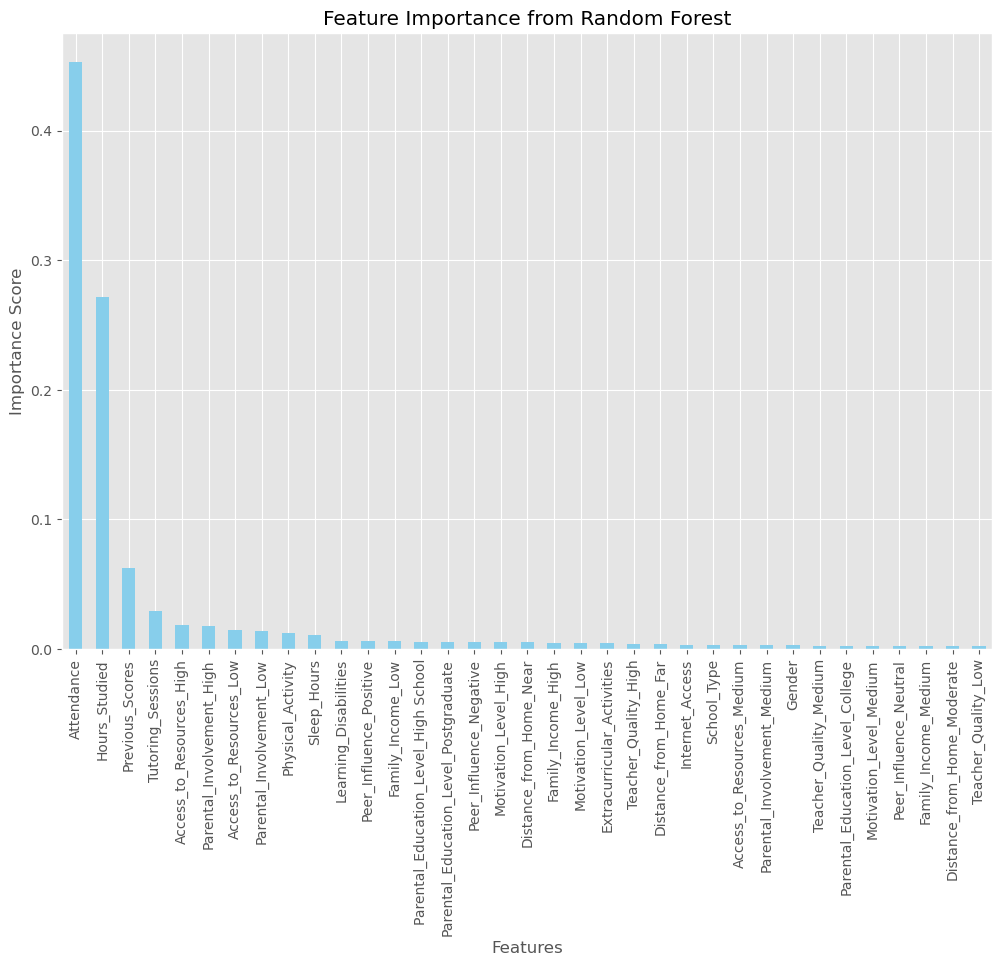

In [14]:
# Random Forest Regressor

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Encode categorical variables
X = student_data.drop('Exam_Score', axis=1)
y = student_data['Exam_Score']

# Convert categorical features into dummy/indicator variables
X = pd.get_dummies(X)

# Fit Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Extract and plot feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [15]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

# Encode categorical variables using One-Hot Encoding
X = pd.get_dummies(X)

# Use Recursive Feature Elimination (RFE) to select top 10 features
rfe_model = LinearRegression()
rfe = RFE(estimator=rfe_model, n_features_to_select=10)
rfe.fit(X, y)

# Step 3: Check which features were selected
selected_features = X.columns[rfe.support_]
print("\nTop Selected Features using RFE:\n")
print(selected_features)


Top Selected Features using RFE:

Index(['Family_Income_High', 'Family_Income_Low', 'Family_Income_Medium',
       'Parental_Involvement_High', 'Parental_Involvement_Low',
       'Parental_Involvement_Medium', 'Parental_Education_Level_Postgraduate',
       'Distance_from_Home_Far', 'Distance_from_Home_Moderate',
       'Distance_from_Home_Near'],
      dtype='object')


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import optuna
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, max_error

# Use only necessary features from feature selection techniques
selected_features = [
    'Parental_Involvement_High', 'Parental_Involvement_Low', 'Parental_Involvement_Medium',
    'Parental_Education_Level_High School', 'Access_to_Resources_High', 'Access_to_Resources_Medium', 'Access_to_Resources_Low',
    'Family_Income_High', 'Family_Income_Medium', 'Family_Income_Low', 'Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions'
]

# Apply PolynomialFeatures for non-linear relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(student_data[numerical_cols])

# PCA to reduce dimensionality
pca = PCA(n_components=10)
pca_features = pca.fit_transform(poly_features)

# Create a new dataframe with the PCA components
pca_features_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
student_data.reset_index(drop=True, inplace=True)
student_data_pca = pd.concat([student_data.drop(columns=numerical_cols), pca_features_df], axis=1)

# Splitting into features and target variable
X = student_data_pca
y = student_data['Exam_Score']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(pca_features, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor()
}

# Bayesian Hyperparameter Optimization with Optuna
def objective(trial, model_name, model):
    # Define the hyperparameters for each model
    if model_name == "Random Forest Regressor":
        n_estimators = trial.suggest_int('n_estimators', 50, 500)
        max_depth = trial.suggest_int('max_depth', 3, 15)
        model.set_params(n_estimators=n_estimators, max_depth=max_depth)
    elif model_name == "Gradient Boosting Regressor":
        n_estimators = trial.suggest_int('n_estimators', 50, 500)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        model.set_params(n_estimators=n_estimators, learning_rate=learning_rate)
    elif model_name == "Support Vector Regressor":
        C = trial.suggest_float('C', 0.1, 10.0)
        epsilon = trial.suggest_float('epsilon', 0.01, 1.0)
        model.set_params(C=C, epsilon=epsilon)
    elif model_name == "K-Nearest Neighbors Regressor":
        n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
        model.set_params(n_neighbors=n_neighbors)
    
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=kf, n_jobs=-1)
    return np.mean(scores)

optimized_models = {}
for model_name, model in models.items():
    if model_name in ["Random Forest Regressor", "Gradient Boosting Regressor", "Support Vector Regressor", "K-Nearest Neighbors Regressor"]:
        study = optuna.create_study(direction='maximize')
        study.optimize(lambda trial: objective(trial, model_name, model), n_trials=30)
        best_params = study.best_params
        model.set_params(**best_params)
    optimized_models[model_name] = model

results = []

for model_name, model in optimized_models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    max_err = max_error(y_test, y_pred)
    
    # Store the results
    results.append({
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Explained Variance Score': explained_var,
        'Max Error': max_err
    })

# Displaying the Results
results_df = pd.DataFrame(results)
print("\nEvaluation Metrics for Each Model After Optimization:\n")
print(results_df)

[I 2024-12-06 14:42:25,965] A new study created in memory with name: no-name-48979465-1fc9-417a-9c1e-eadb56928aa3
[I 2024-12-06 14:42:38,884] Trial 0 finished with value: 0.9221004528848871 and parameters: {'n_estimators': 318, 'max_depth': 12}. Best is trial 0 with value: 0.9221004528848871.
[I 2024-12-06 14:42:48,900] Trial 1 finished with value: 0.9220573331586073 and parameters: {'n_estimators': 244, 'max_depth': 13}. Best is trial 0 with value: 0.9221004528848871.
[I 2024-12-06 14:42:53,561] Trial 2 finished with value: 0.9164957826034229 and parameters: {'n_estimators': 147, 'max_depth': 9}. Best is trial 0 with value: 0.9221004528848871.
[I 2024-12-06 14:42:57,158] Trial 3 finished with value: 0.9221062945464725 and parameters: {'n_estimators': 85, 'max_depth': 15}. Best is trial 3 with value: 0.9221062945464725.
[I 2024-12-06 14:43:06,132] Trial 4 finished with value: 0.84687566381654 and parameters: {'n_estimators': 438, 'max_depth': 5}. Best is trial 3 with value: 0.922106294


Evaluation Metrics for Each Model After Optimization:

                           Model       MAE       MSE      RMSE        R²  \
0              Linear Regression  0.191022  0.062895  0.250788  0.936538   
1        Random Forest Regressor  0.194737  0.079754  0.282407  0.919527   
2    Gradient Boosting Regressor  0.196691  0.067101  0.259038  0.932294   
3       Support Vector Regressor  0.181530  0.064254  0.253484  0.935166   
4  K-Nearest Neighbors Regressor  0.201145  0.066473  0.257823  0.932928   

   Explained Variance Score  Max Error  
0                  0.936538   2.101163  
1                  0.919541   2.757276  
2                  0.932307   1.900116  
3                  0.935216   1.765294  
4                  0.933157   1.186010  


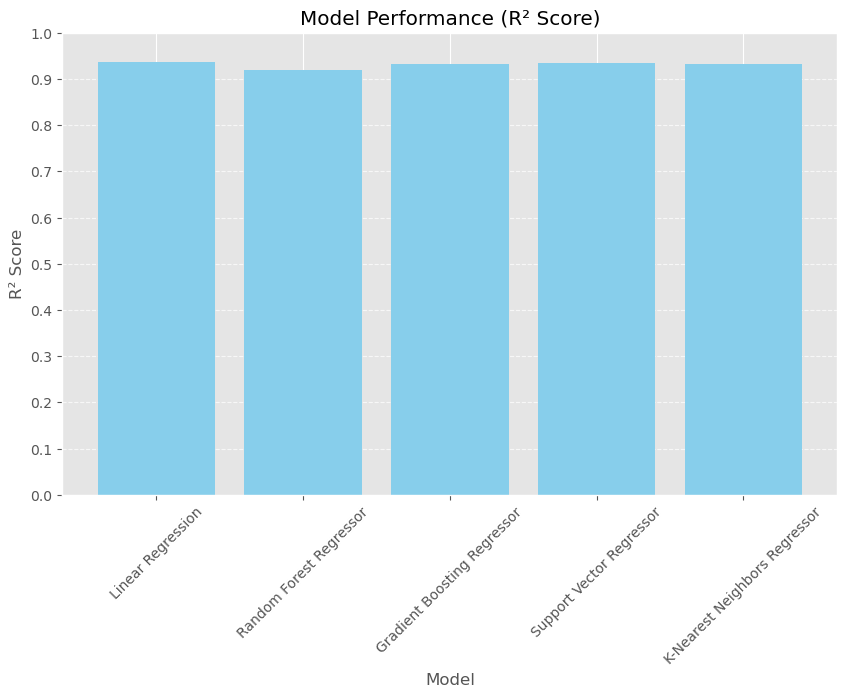

In [25]:
# Bar plot for R² scores
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R²'], color='skyblue')
plt.title('Model Performance (R² Score)')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

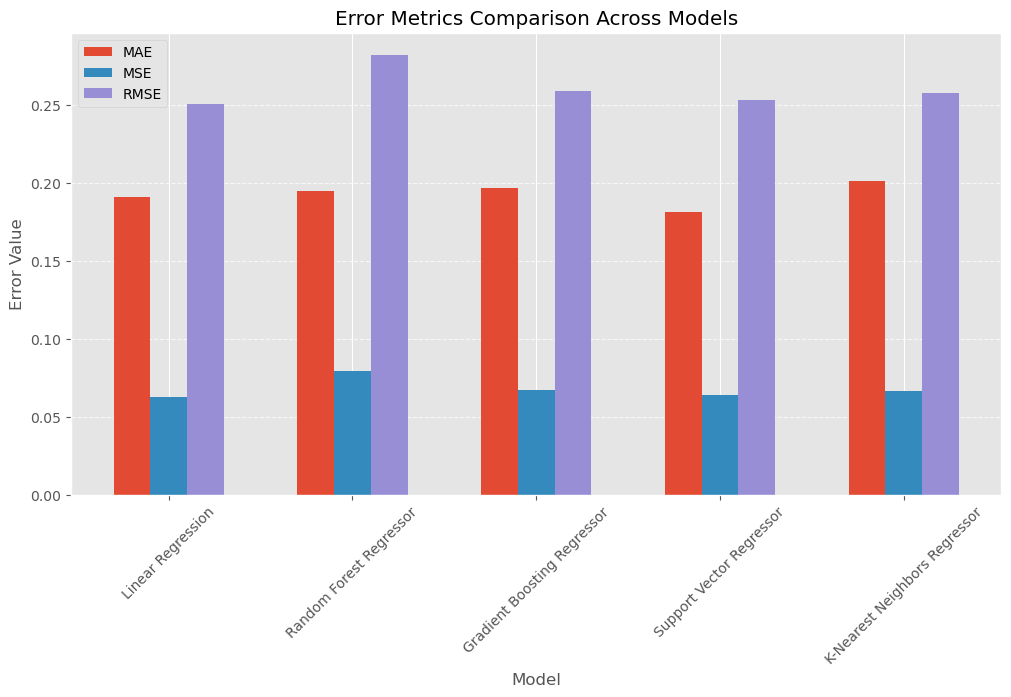

In [18]:
# Grouped bar plot for MAE, MSE, and RMSE
error_metrics = ['MAE', 'MSE', 'RMSE']
x = range(len(results_df['Model']))

plt.figure(figsize=(12, 6))
for i, metric in enumerate(error_metrics):
    plt.bar([p + i*0.2 for p in x], results_df[metric], width=0.2, label=metric)

plt.title('Error Metrics Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('Error Value')
plt.xticks([p + 0.2 for p in x], results_df['Model'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

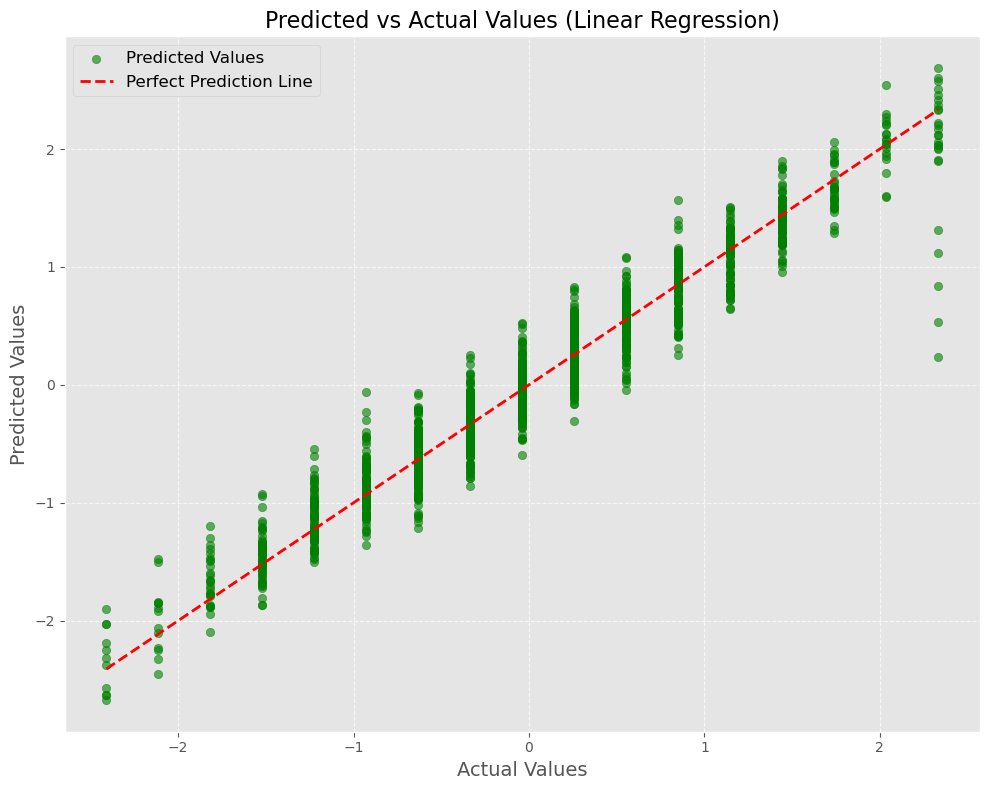

In [26]:
# # Scatter Plot of Predicted vs Actual Values for Best Model that is "Linear Regression"
best_model_name = "Linear Regression"
best_model = optimized_models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best, color='green', alpha=0.6, label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label='Perfect Prediction Line')
plt.title(f'Predicted vs Actual Values ({best_model_name})', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()